In [14]:
import tensorflow as tf
#tf.__version__

In [15]:
from tensorflow import keras

In [16]:
from tensorflow.keras.preprocessing.text import one_hot

In [17]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Dataset = pd.read_csv('train_news.csv')

In [18]:
Dataset.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [19]:
#Removing duplicates
Dataset.drop_duplicates(inplace = True)

In [20]:
#check for null values
Dataset.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [21]:
Dataset.shape

(20800, 6)

In [22]:
#drop null values
d1 = Dataset.dropna()
d1.shape

(18285, 6)

In [23]:
d2 = d1.copy()
d2.reset_index(inplace=True)

In [24]:
## Get the Dependent features
y=d2['label']

In [25]:
y.shape

(18285,)

In [26]:
#Text Cleaning
import re
import string

from nltk.corpus import stopwords

# Using Lemmatizer.
from nltk.stem import WordNetLemmatizer
WL = WordNetLemmatizer()

corpus = []

for i in range(0, len(d2)):
    
    #Remove Unicode characters
    #TITLE = re.sub(r'[^\x00-\x7F]+', '', TITLE)
    TITLE = re.sub('[^a-zA-Z]', ' ', d2['headline'][i])

    #Convert to lowercase to maintain consistency
    TITLE = TITLE.lower()
    TITLE = TITLE.split()
    TITLE = [WL.lemmatize(word) for word in TITLE if not word in stopwords.words('english')]

    TITLE = ' '.join(TITLE)
    corpus.append(TITLE)

In [ ]:
# count plot on single categorical variable
import seaborn as sns, numpy as np
from matplotlib import pyplot as plt
sns.countplot(x ='label', data = d2)
 
# Show the plot
plt.show()

# OneHot Representation

In [27]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense

In [28]:
### Vocabulary size
voc_size=5000

In [29]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[2635, 3438, 2258, 1416, 1352, 4607, 378, 956, 466, 2890],
 [4535, 1130, 3381, 4523, 3542, 1024, 2145, 3838, 956, 466, 2890],
 [2910, 3087, 4854, 4357, 1668, 119, 3243, 3909, 4789, 2447],
 [729, 1364, 1450, 970, 378, 3383, 875, 2323, 4137, 956, 466, 2890],
 [3165, 967, 4412],
 [4183, 2814, 2269, 3887, 4184, 4807, 1065, 956, 466, 2890],
 [4501, 4602, 308, 912, 4602, 2146, 3303, 1283, 1844, 3375],
 [377, 4108, 3213, 4240],
 [4379, 82, 2156, 956, 4377, 1213, 455, 3029, 901, 1728, 2021],
 [4790, 3772, 2455, 4460, 3862, 442, 1251, 4602],
 [2737, 3436, 3718, 3527, 4621, 4074, 1666],
 [1765, 967, 513, 183, 3072, 775],
 [3644, 384, 4152, 780, 4583, 2806, 1765, 967, 956, 466, 2890],
 [4585, 4866, 367, 1969, 2556, 2482],
 [2202, 4594, 541, 1475, 3927, 4938],
 [2338, 3945, 4407, 4675, 1474, 1799, 2890, 2044, 956, 466, 2890],
 [3003, 4979, 1887, 967, 3895, 2286, 2028, 2202, 956, 466, 2890],
 [2348, 1650, 2541, 4790, 4903, 269, 3637, 497, 2447],
 [4041, 4144, 956, 2948, 675, 956, 466, 2890],
 [413

# Embedding Representation

In [30]:
sent_length=200
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  956  466 2890]
 [   0    0    0 ...  956  466 2890]
 [   0    0    0 ... 3909 4789 2447]
 ...
 [   0    0    0 ... 4152 1279 1797]
 [   0    0    0 ...  956  466 2890]
 [   0    0    0 ... 4218 3029 2447]]


In [31]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
len(embedded_docs)

In [36]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 40)           200000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               53760     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 253,889
Trainable params: 253,889
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [38]:
X_final.shape,y_final.shape

((18285, 200), (18285,))

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [40]:
### Finally Training
history=model.fit(X_train,y_train,validation_data= (X_test,y_test), epochs=10, batch_size=64)

#print(history.history['loss'])
#print(history.history['accuracy'])

Epoch 1/10
192/192 [==============================] - 75s 390ms/step - loss: 0.3642 - accuracy: 0.8254 - val_loss: 0.2036 - val_accuracy: 0.9148
Epoch 2/10
192/192 [==============================] - 74s 384ms/step - loss: 0.1502 - accuracy: 0.9420 - val_loss: 0.1954 - val_accuracy: 0.9251
Epoch 3/10
192/192 [==============================] - 73s 382ms/step - loss: 0.1086 - accuracy: 0.9620 - val_loss: 0.2009 - val_accuracy: 0.9243
Epoch 4/10
192/192 [==============================] - 69s 362ms/step - loss: 0.0695 - accuracy: 0.9790 - val_loss: 0.2410 - val_accuracy: 0.9168
Epoch 5/10
192/192 [==============================] - 66s 341ms/step - loss: 0.0485 - accuracy: 0.9851 - val_loss: 0.2771 - val_accuracy: 0.9193
Epoch 6/10
192/192 [==============================] - 67s 347ms/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.3024 - val_accuracy: 0.9115
Epoch 7/10
192/192 [==============================] - 68s 352ms/step - loss: 0.0193 - accuracy: 0.9944 - val_loss: 0.3798 - val_ac

In [ ]:
#print(history.history['val_loss'])
#print(history.history['val_accuracy'])

In [41]:
#y_pred=model.predict_classes(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.38%


In [43]:
from sklearn.metrics import classification_report
target_names = ['Real', 'Fake']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Real       0.92      0.92      0.92      3413
        Fake       0.90      0.90      0.90      2622

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm_Df = pd.DataFrame(cm, index=['real', 'fake'], columns= ['real', 'fake'], )
cm_Df.head()

,real,fake
real,3150,263
fake,257,2365


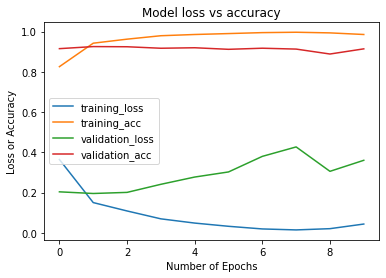

In [45]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_loss'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Model loss vs accuracy')
pyplot.xlabel('Number of Epochs')
pyplot.ylabel('Loss or Accuracy')
pyplot.legend(['training_loss', 'training_acc', 'validation_loss', 'validation_acc'], loc='best')
pyplot.show()